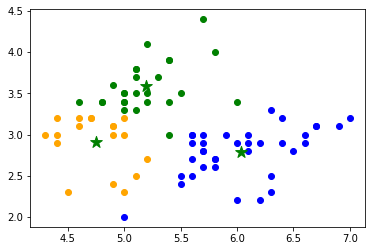

[0 0 0 1 2 2 2 0 2 2 2 1 0 2 0 2 0 0 1 2]


In [1]:
import numpy as np
import qiskit
from qiskit.providers import BaseBackend
from qlkit.algorithms.qkmeans.qkmeans import QKMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# preparing the parameters for the algorithm
backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')

qkmeans = QKMeans(
        n_clusters=3,
        backend=backend
        )

X, y = load_iris(return_X_y=True)
X = np.asarray([x[0:2] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Perform quantum kmeans clustering
qkmeans.fit(X_train, y_train)

# Plot the results
colors = ['blue', 'orange', 'green']
for i in range(X_train.shape[0]):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[qkmeans.clusters[i]])
plt.scatter(qkmeans.centroids[:, 0], qkmeans.centroids[:, 1], marker='*', c='g', s=150)
plt.show()

# Predict new points
prediction = qkmeans.predict(X_test)
print(prediction)

In [2]:
import qiskit
from qiskit.providers import BaseBackend
import numpy as np
from qlkit.algorithms import QKNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qlkit.encodings import AmplitudeEncoding

# preparing the parameters for the algorithm
encoding_map = AmplitudeEncoding()
backend: BaseBackend = qiskit.Aer.get_backend('qasm_simulator')

qknn = QKNeighborsClassifier(
    n_neighbors=3,
    encoding_map=encoding_map,
    backend=backend
)

X, y = load_iris(return_X_y=True)
X = np.asarray([x[0:2] for x, y_ in zip(X, y) if y_ != 2 ])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
qknn.fit(X_train, y_train)

prediction = qknn.predict(X_test)
print(prediction)
print(y_test)

print("Test Accuracy: {}".format(
    sum([1 if p == t else 0 for p, t in zip(prediction, y_test)]) / len(prediction)
))

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Test Accuracy: 1.0


In [3]:
import qiskit
import numpy as np
from qlkit.algorithms import QSVClassifier
from qiskit.providers import BaseBackend
from qiskit.circuit.library import ZZFeatureMap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# preparing the parameters for the algorithm
encoding_map = ZZFeatureMap(2)
backend: BaseBackend = qiskit.Aer.get_backend('aer_simulator_statevector')

qsvc = QSVClassifier(
    encoding_map=encoding_map,
    backend=backend
)

X, y = load_iris(return_X_y=True)
X = np.asarray([x[0:2] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
qsvc.fit(X_train, y_train)

print("Test Accuracy: {}".format(
    qsvc.score(X_test, y_test)
))

Test Accuracy: 0.95
